In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# 1. Introduction

**Version Information**
- this version is conducted to Which features are most indicative of a poisonous mushroom and Which features are most indicative of a poisonous mushroom
<br><br>

**Dataset Information**
- This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981)
<br><br>

**Attribute Information**
- Target Variable
  - class: edible=e, poisonous=p

- Features

  - cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
  - cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
  - cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
  - bruises: bruises=t,no=f
  - odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
  - gill-attachment: attached=a,descending=d,free=f,notched=n
  - gill-spacing: close=c,crowded=w,distant=d
  - gill-size: broad=b,narrow=n
  - gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
  - stalk-shape: enlarging=e,tapering=t
  - stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
  - stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
  - stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
  - stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
  - stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
  - veil-type: partial=p,universal=u
  - veil-color: brown=n,orange=o,white=w,yellow=y
  - ring-number: none=n,one=o,two=t
  - ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
  - spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
  - population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
  - habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

#  2. Importing Libraries

In [2]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
import shap

# 2. Data Overview

In [3]:
data = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
data = data[data['stalk-root'] != '?'] #eliminate missing value
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
# pick independent variables
columns = list(data.columns)
independent_var = columns[1:] 
print(independent_var)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [5]:
# take a look at independent variables' variation
category = dict()

for col in independent_var:
  tmp = data[col].unique().tolist()
  tmp.sort()
  category[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(category)
data_variation_independent = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_independent

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
data variation,"b, c, f, k, s, x","f, g, s, y","b, c, e, g, n, p, w, y","f, t","a, c, f, l, m, n, p","a, f","c, w","b, n","g, h, k, n, p, r, u, w, y","e, t",...,"f, k, s, y","b, c, g, n, p, w, y","b, c, g, n, p, w, y",p,"w, y","n, o, t","e, l, n, p","h, k, n, r, u, w","a, c, n, s, v, y","d, g, l, m, p, u"


# 3 Exploratory Data Analysis

In [6]:
data_viz = data.copy()
data_viz.loc[:,'class'] = data_viz.loc[:, 'class'].apply(lambda x: 'Poisonous' if x == 'p' else 'Edible')
data_viz

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,Edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,Edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,Poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,Edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,Edible,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8001,Edible,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8038,Edible,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8095,Poisonous,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


## 3.1 Class Percentage

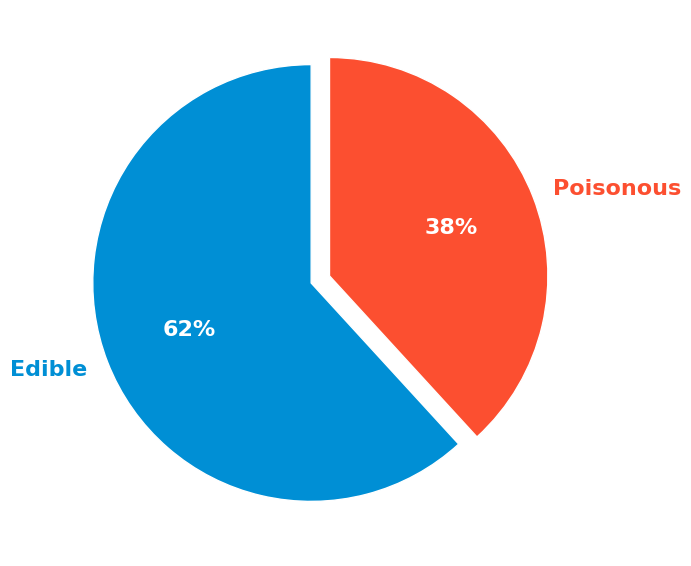

In [7]:
pie_data = data_viz['class'].value_counts(normalize=True).values * 100
pie_label = data_viz['class'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.09],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()
#perlukah oversampling?
#memakai definisi exp date + 30 days

> 62% of the data is edible mushrooms.

## 3.2 Poisonous Probability

In [8]:
columns = data_viz['class']
attr_crosstab = pd.DataFrame()

for col in independent_var:
    # create crosstab for each attribute
    index = data_viz[col]
    ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

    # add prefix to each category
    # format: column name (category)
    col_titleize = col.title()
    ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

    # rename the column
    ct.rename(columns={col:'attribute'}, inplace=True)

    # create a single dataframe
    attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Poisonous', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()


,attribute,Edible,Poisonous
0,Stalk-Surface-Above-Ring (k),0.000000,1.000000
1,Stalk-Color-Below-Ring (c),0.000000,1.000000
2,Gill-Color (y),0.000000,1.000000
3,Gill-Attachment (a),0.000000,1.000000
4,Odor (p),0.000000,1.000000
5,Cap-Shape (c),0.000000,1.000000
6,Odor (m),0.000000,1.000000
7,Stalk-Surface-Below-Ring (k),0.000000,1.000000
8,Odor (f),0.000000,1.000000
9,Odor (c),0.000000,1.000000


> well it might be an easy case. since there are so many attributes having possibility leads to Poisonous/Edible.

# 4. Data Preprocessing

## 4.1 Train/Test Split

In [9]:
#pre processing
#train test
data_X = data.drop('class', axis=1)
data_y = data['class']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

## 4.2 Encoding

In [10]:
#label encoding 
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [11]:
le.classes_

array(['e', 'p'], dtype=object)

In [12]:
print(y_train[:5].values)
print(y_train_encode[:5])

['p' 'e' 'e' 'e' 'e']
[1 0 0 0 0]


In [13]:
# One_Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

ohe.fit(X_train[independent_var])

X_train_ohe = ohe.transform(X_train[independent_var])
X_test_ohe = ohe.transform(X_test[independent_var])

In [14]:
X_train_ohe

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'gill-attachment_f', 'gill-spacing_w', 'gill-size_n',
       'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-ab

In [16]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = X_train_ohe_df
X_train_encode.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
5981,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2130,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
779,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2530,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1835,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = X_test_ohe_df
X_test_encode.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
3478,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3017,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
662,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3204,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# 5. Model Development

## 5.1 Metrics Definition

In [18]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [19]:
def fbeta_score(accuracy, recall, beta=1):
  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  
  return fbeta_score

## 5.2 Some Models to Experiment

In [20]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}


X_train_model = X_train_encode.copy()
y_train_model = y_train_encode.copy() 

X_test_model = X_test_encode.copy()
y_test_model = y_test_encode.copy()

## 5.3 Train and Test the Models

In [21]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score = get_score(y_pred_list, y_test_model, average='macro')

[LightGBM] [Info] Number of positive: 1509, number of negative: 2441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 3950, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382025 -> initscore=-0.480961
[LightGBM] [Info] Start training from score -0.480961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
SVC,1.000000,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Hist Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000


not surprisingly, the result is 100% accuracy and precision at any given models. this kind of data features' distribution make almost any simple model. **please take a look at 3.2**

as you can see in another Notebooks, **almost every Kaggler using this Dataset shall gain perfect result.**

### But I'll keep continue into Feature Selection Steps

# 6. Feature Selection

## 6.1 Univariate Filter (ANOVA)

In [22]:
threshold = 56 

filter = SelectKBest(score_func=f_classif, k=threshold) #anova based f-value between features
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (3950, 92)
after filter	: (3950, 56)


Features [65] are constant.
invalid value encountered in divide


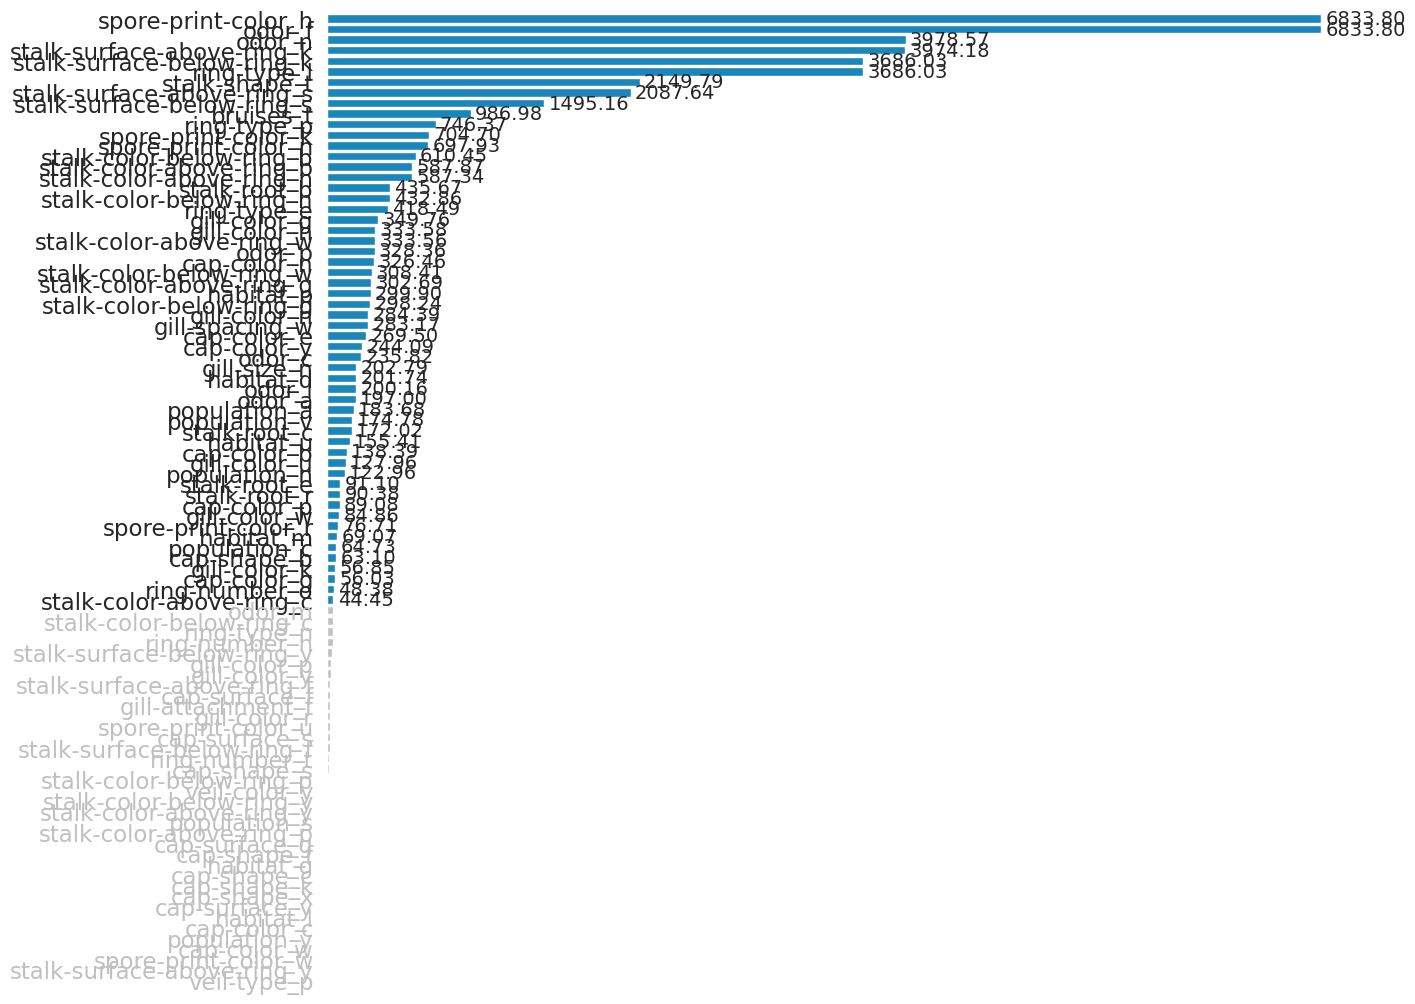

In [23]:
# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [24]:
# the result
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_filter = get_score(y_pred_list, y_test_model, average='macro')

[LightGBM] [Info] Number of positive: 1509, number of negative: 2441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 3950, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382025 -> initscore=-0.480961
[LightGBM] [Info] Start training from score -0.480961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
SVC,1.000000,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Hist Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000


### 6.2 Wrapper Method - Recursive Feature Elimination (RFE) using Logistic Regression


In [25]:
threshold = 50
estimator = LogisticRegression(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap = wrapper.transform(X_train_model)
X_test_wrap = wrapper.transform(X_test_model)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap.shape)

before wrapper	: (3950, 92)
after wrapper	: (3950, 50)


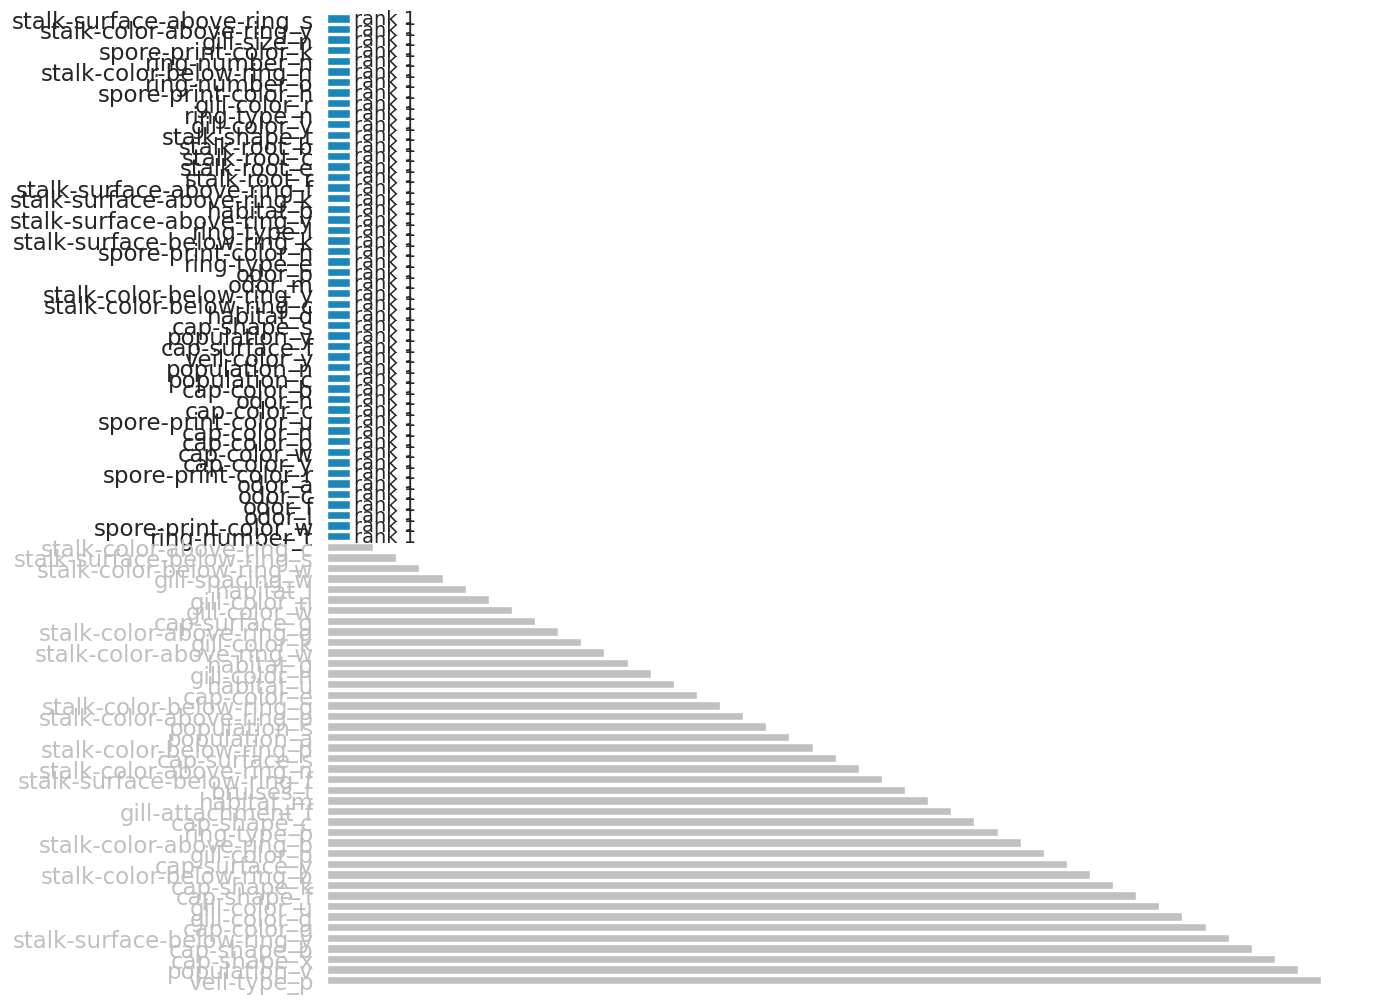

In [26]:
# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'rank {val:.0f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [27]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap)

score_wrap = get_score(y_pred_list, y_test_model, average='macro')

[LightGBM] [Info] Number of positive: 1509, number of negative: 2441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 3950, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382025 -> initscore=-0.480961
[LightGBM] [Info] Start training from score -0.480961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
SVC,1.000000,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Hist Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.3 feature selection comparison

In [28]:
score_filter_mean = pd.DataFrame(score_filter.mean(), columns=['filter method']).T
score_wrap_mean = pd.DataFrame(score_wrap.mean(), columns=['wrapper method']).T

score_compare = pd.concat([score_filter_mean,
                           score_wrap_mean], axis=0)

score_compare.style.background_gradient(axis=0)

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
filter method,1.000000,1.000000,1.000000,1.000000,1.000000
wrapper method,1.000000,1.000000,1.000000,1.000000,1.000000


# 7. Model Selection

Since all model is 100% accurate, i will just pick one of the filtered one: Logistic Regression.

In [29]:
model = LogisticRegression(max_iter=1000, random_state=1)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1047
           1      1.000     1.000     1.000       647

    accuracy                          1.000      1694
   macro avg      1.000     1.000     1.000      1694
weighted avg      1.000     1.000     1.000      1694



# 8. SHAP Explainer

In [30]:
shap.initjs()

## 8.1 Input Data

In [31]:
input_test = pd.DataFrame(X_test_filter, columns = X_train_model.columns[filter.get_support()])
input_test = pd.DataFrame(input_test.iloc[1]).T
input_test

,cap-shape_b,cap-color_b,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_y,bruises_t,odor_a,odor_c,...,spore-print-color_n,spore-print-color_r,population_a,population_c,population_n,population_v,habitat_d,habitat_m,habitat_p,habitat_u
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 8.2 Baseline Prediction

In [32]:
explainer = shap.Explainer(model, X_train_filter, feature_names=X_train_model.columns[filter.get_support()]) #build explainer
shap_values = explainer.shap_values(X_test_filter) #shap for test data
shap_values_single = explainer(input_test) #clear, unused single input
shap_values_multiple = explainer(X_test_filter) #clear, used test filter
expected_value = explainer.expected_value
print(f'Baseline Prediction: {expected_value}')

Baseline Prediction: -1.188924502580993


## 8.3 SHAP Summary Plot

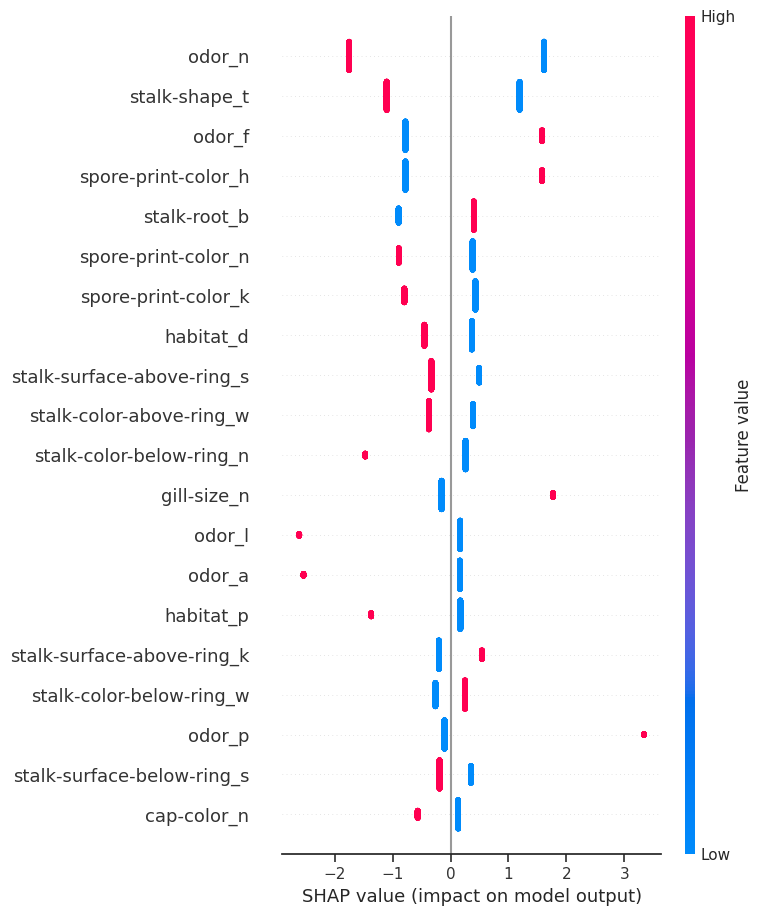

In [33]:
# Generate summary plot
shap.summary_plot(shap_values, X_test_filter, feature_names=X_train_model.columns[filter.get_support()])
plt.show()

## 8.4 Force Plot

In [34]:
shap.plots.force(shap_values_multiple[0])

## 8.5 Waterfall Plot

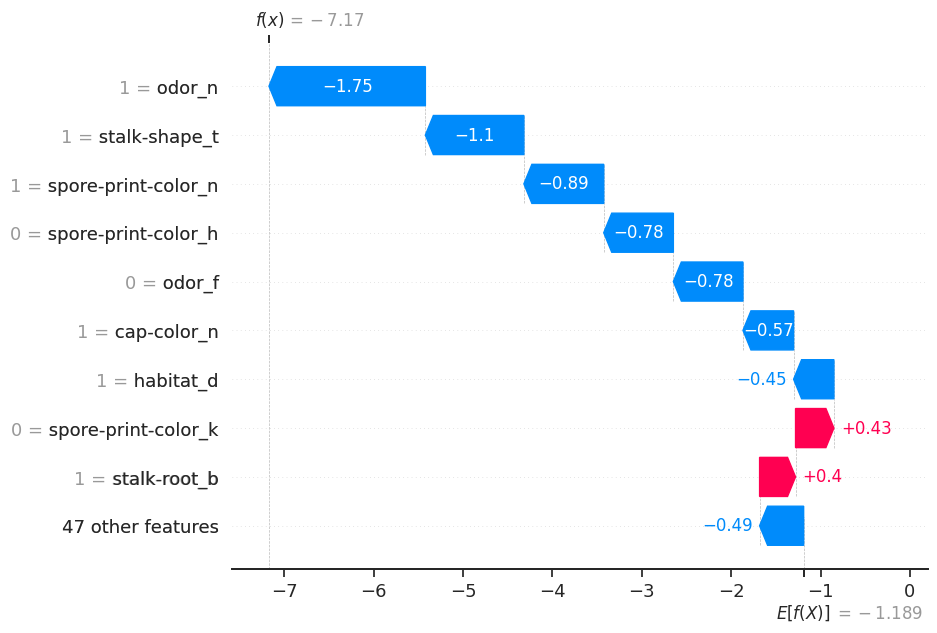

In [35]:
shap.plots.waterfall(shap_values_multiple[0])

## 8.6 Explanation

After analyzing the **SHAP values**, it becomes evident that certain characteristics significantly influence whether a mushroom is classified as **poisonous** or **edible**. For instance, consider the absence of odor in mushrooms (**odor_n**) — akin to the case of the harmless **Button mushroom**, which often lacks any discernible odor. This lack of odor dramatically reduces the likelihood of a mushroom being poisonous, aligning with our understanding that **many poisonous mushrooms emit distinctive odors as a warning sign.**

Furthermore, the presence of a **tapering stalk shape** (stalk-shape_t) contributes to mushrooms being classified as **edible**. Imagine the elegant, slender stalk of the **Shiitake mushroom**, a prized delicacy in many cuisines, which often exhibits this characteristic. Mushrooms with this feature are **less likely to be toxic**, suggesting a safer choice for consumption.

Similarly, mushrooms with a **spore print color of brown** (spore-print-color_n) are less likely to be poisonous, reminiscent of the earthy, nutty flavor of the **Portobello mushroom**, which typically has a brown spore print. This coloration is associated with certain edible mushroom species, adding to their appeal and perceived safety.